In [46]:
import numpy as np
import cv2

In [47]:
img = cv2.imread('star.jpeg', cv2.IMREAD_GRAYSCALE)

image_h, image_w = img.shape

sigma_base = 0.707
k = np.sqrt(2)
octaves = []


for octave_i in range(4):
    
    if octave_i == 0:
        current_img = img
    else:
       
        current_img = cv2.resize(current_img, (current_img.shape[1]//2, current_img.shape[0]//2), interpolation=cv2.INTER_LINEAR)
    
    sigma_values = []
    gaussian_images = []
    
    
    for scale_i in range(5):
        current_sigma = sigma_base * (k ** scale_i)
        sigma_values.append(current_sigma)
        
        blurred_img = cv2.GaussianBlur(current_img, (0, 0), sigmaX=current_sigma, sigmaY=current_sigma, borderType=cv2.BORDER_DEFAULT)
        gaussian_images.append(blurred_img)
    
    
    octaves.append({
        'gaussian_images': gaussian_images,
        'sigma_values': sigma_values,
        'shape': current_img.shape
    })
    
    


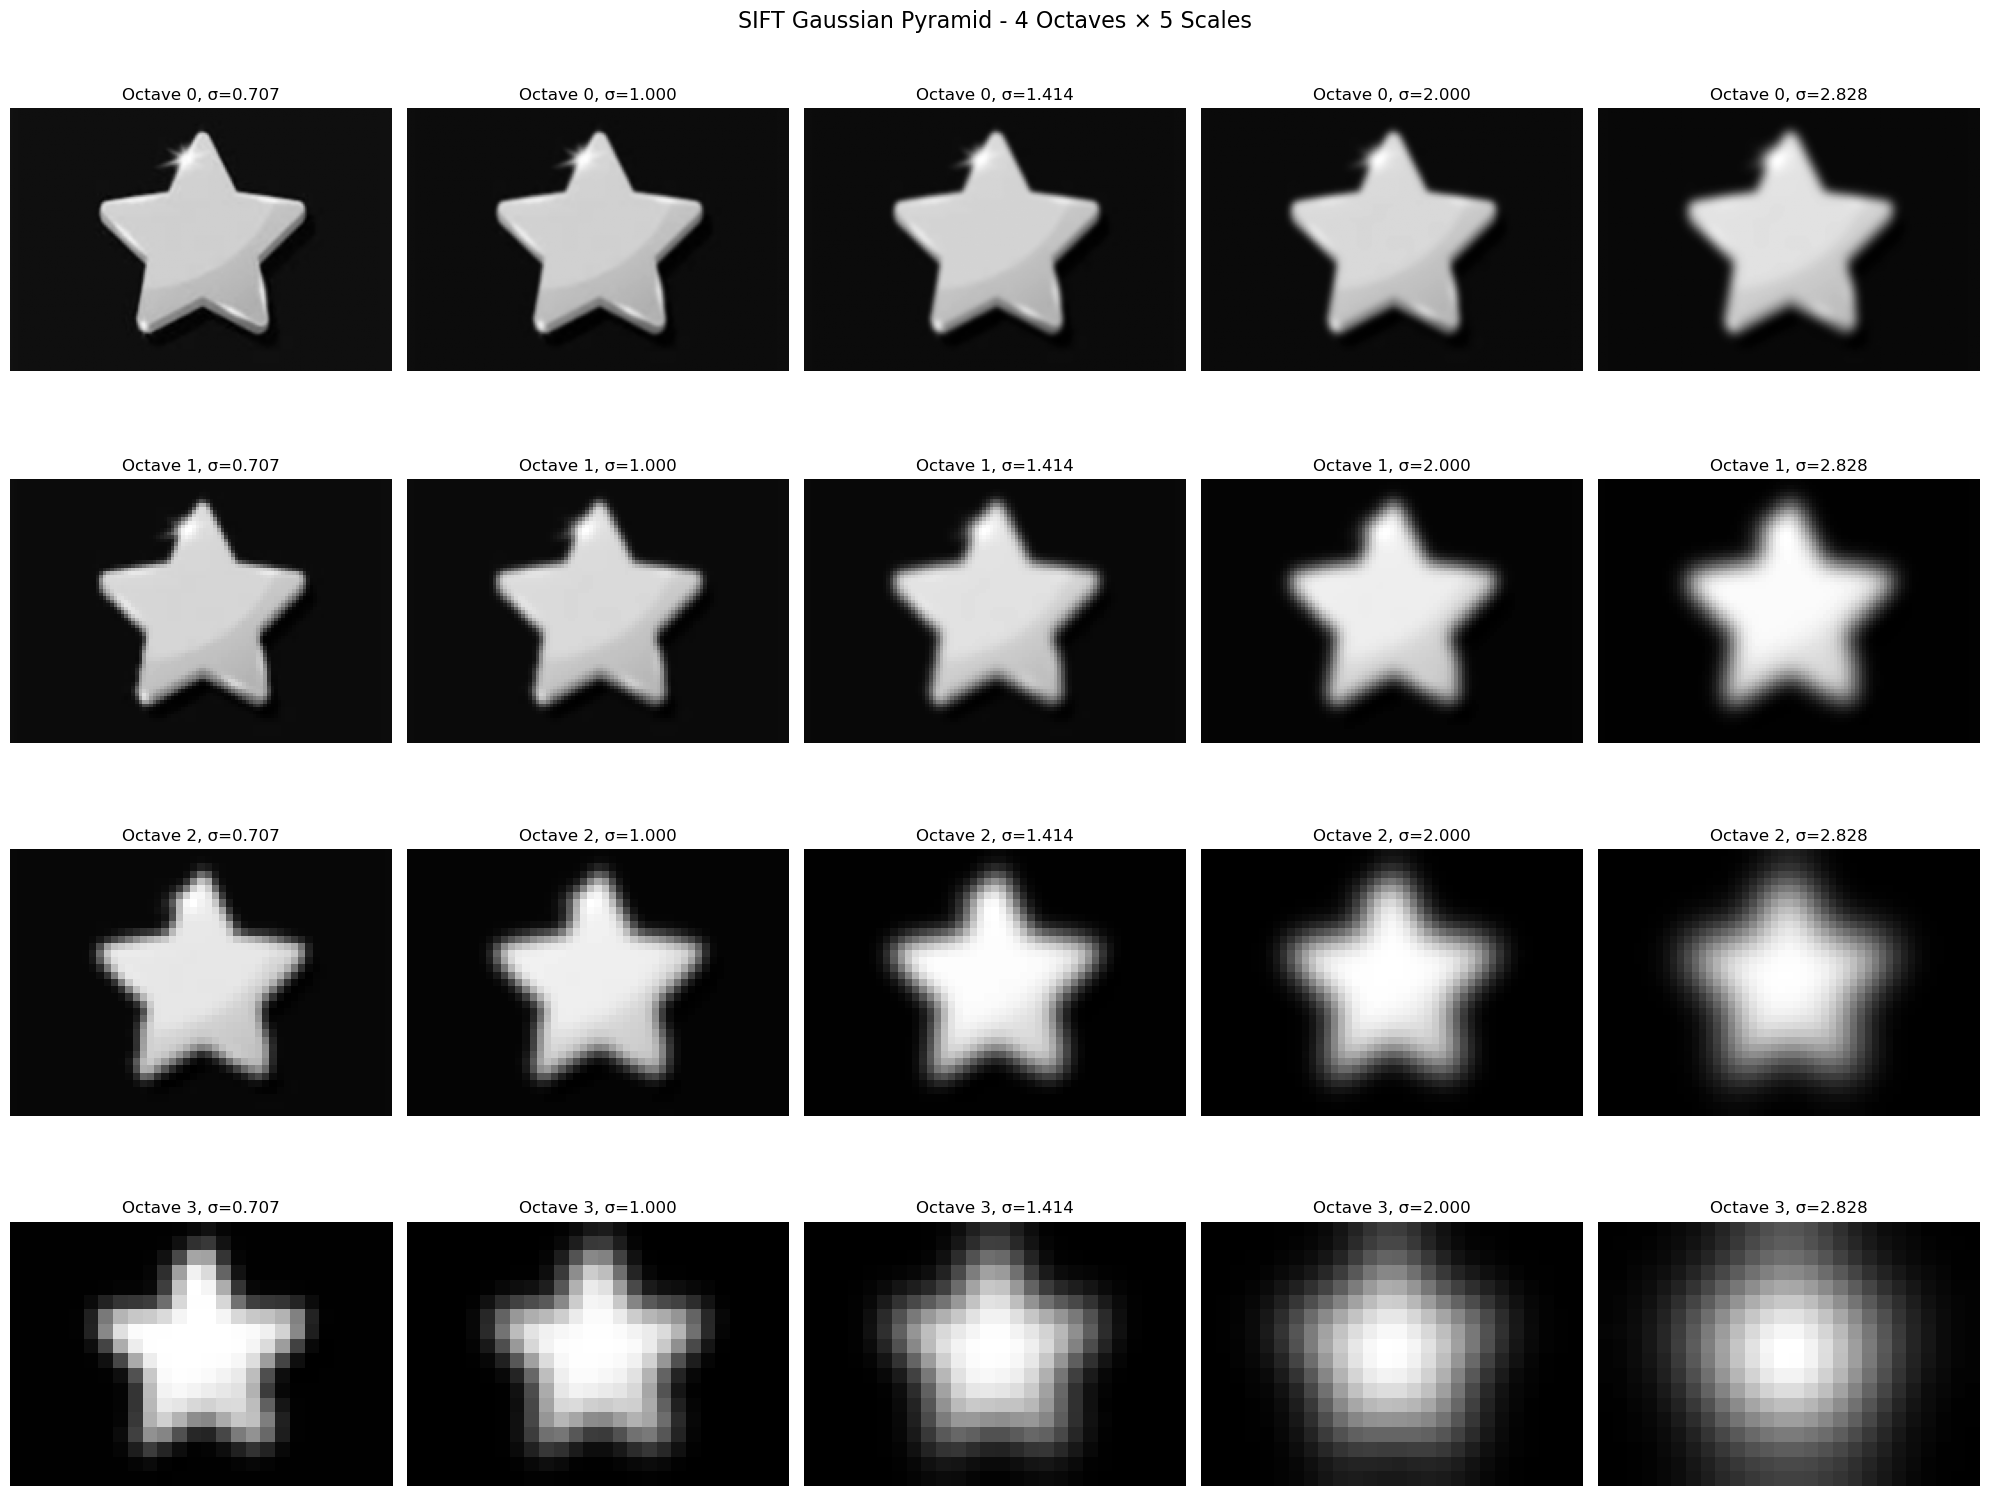

In [48]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('SIFT Gaussian Pyramid - 4 Octaves × 5 Scales', fontsize=16)

for octave_i in range(4):
    for scale_i in range(5):
        ax = axes[octave_i, scale_i]
        img_to_show = octaves[octave_i]['gaussian_images'][scale_i]
        sigma_val = octaves[octave_i]['sigma_values'][scale_i]
        
        ax.imshow(img_to_show, cmap='gray')
        ax.set_title(f'Octave {octave_i}, σ={sigma_val:.3f}')
        ax.axis('off')

plt.tight_layout()
plt.show()

In [49]:

dog_octaves = []

for octave_i in range(4):
    dog_images = []
    
    
    for scale_i in range(4):  
        img1 = octaves[octave_i]['gaussian_images'][scale_i]
        img2 = octaves[octave_i]['gaussian_images'][scale_i + 1]
        
       
        dog = img2 - img1 
        dog_images.append(dog)
    
    dog_octaves.append({
        'dog_images': dog_images,
        'shape': octaves[octave_i]['shape']
    })


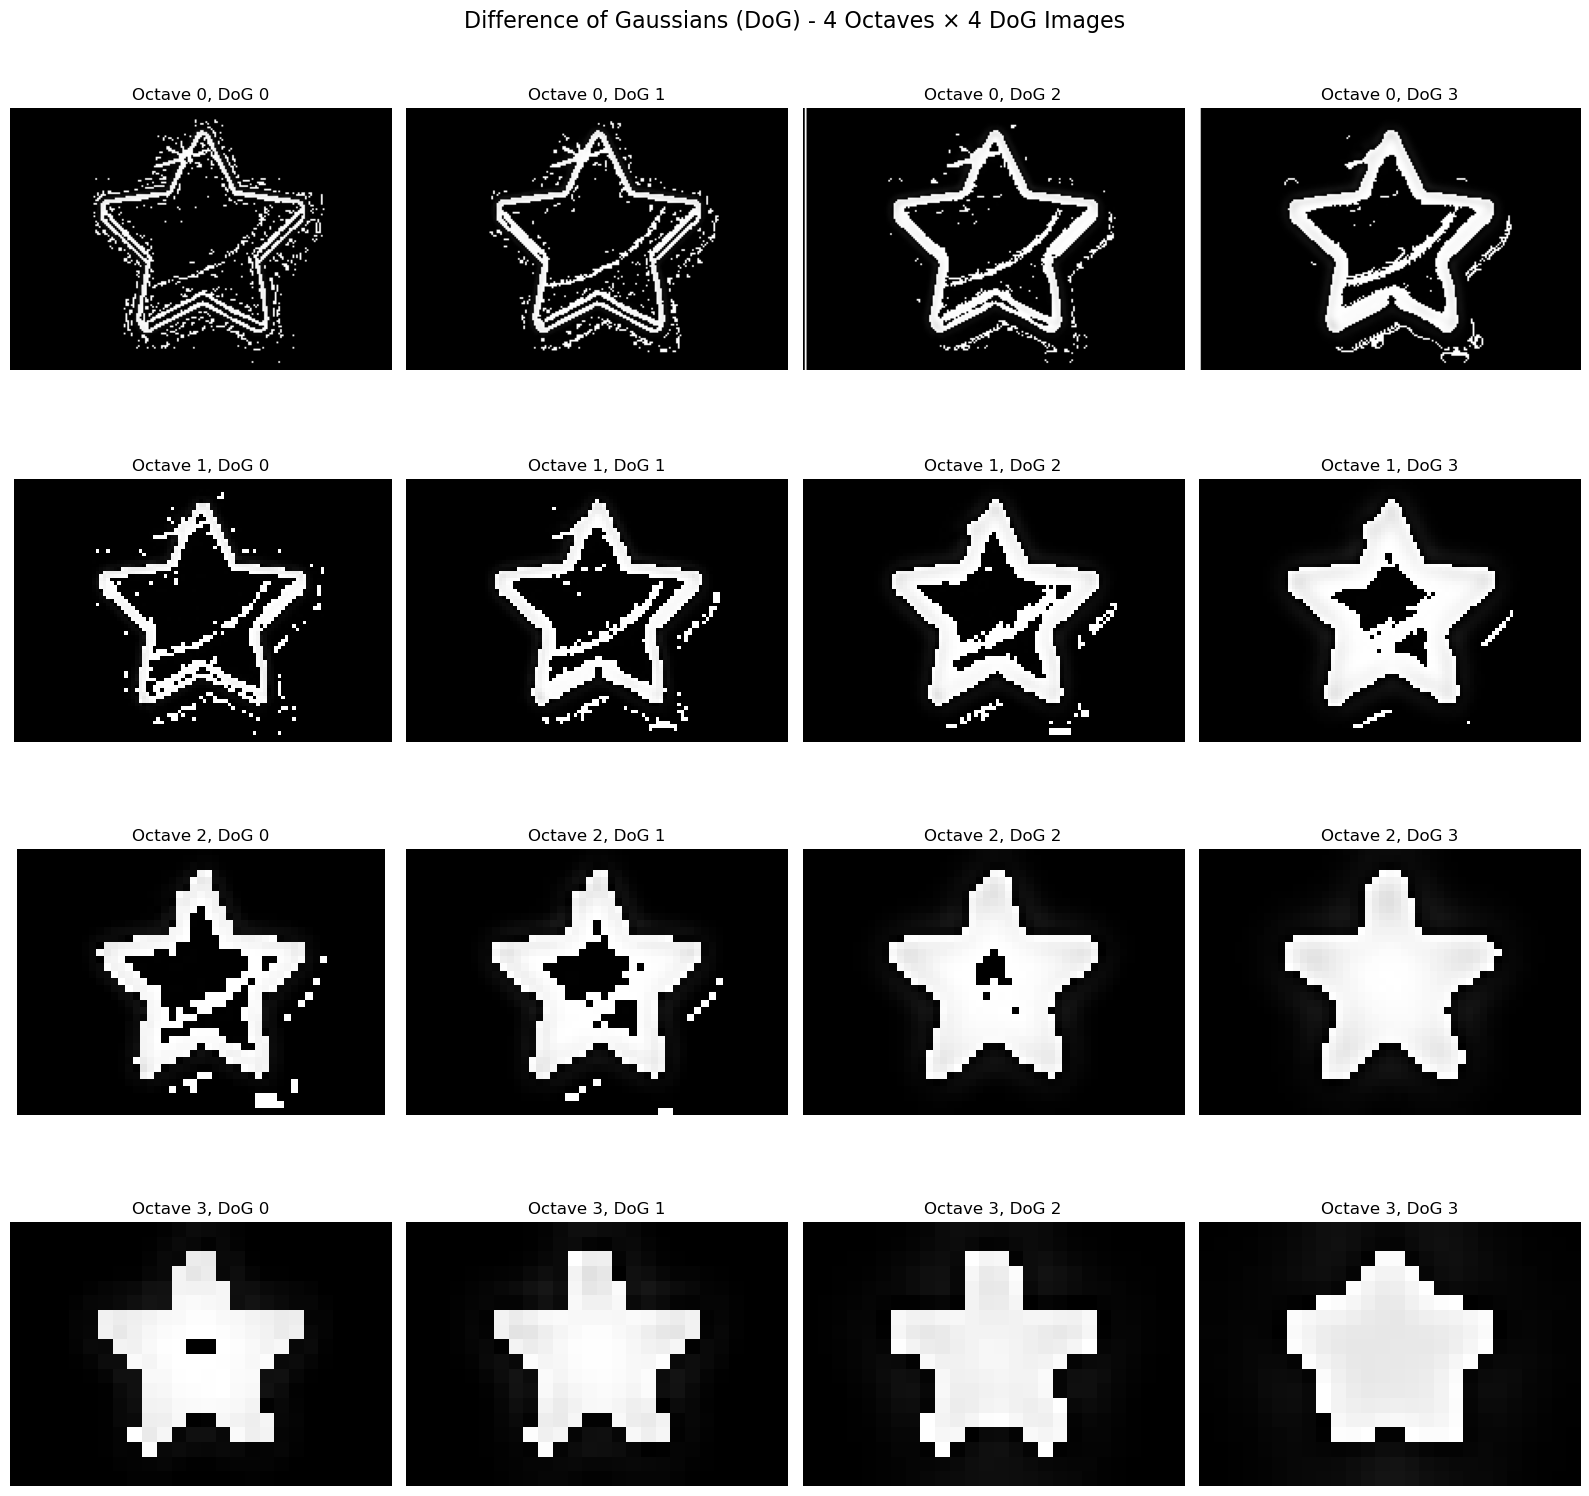

In [50]:

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Difference of Gaussians (DoG) - 4 Octaves × 4 DoG Images', fontsize=16)

for octave_i in range(4):
    for dog_i in range(4):
        ax = axes[octave_i, dog_i]
        dog_img = dog_octaves[octave_i]['dog_images'][dog_i]
        
       
        ax.imshow(dog_img, cmap='gray')
        ax.set_title(f'Octave {octave_i}, DoG {dog_i}')
        ax.axis('off')

plt.tight_layout()
plt.show()


In [51]:

for octave_i, octave_data in enumerate(dog_octaves):
    print(f"\nOctave {octave_i}:")
    print(f"  Shape: {octave_data['shape']}")
    


Octave 0:
  Shape: (148, 215)

Octave 1:
  Shape: (74, 107)

Octave 2:
  Shape: (37, 53)

Octave 3:
  Shape: (18, 26)
